Inputs:
1. Fixed Acidity
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

Output: Quality (Hot coding)
Between 3-8

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd   
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Data import

#headerList = ['Fixed Acidity','Volatile Acidity','Citric Acid','Residual Sugar','Chlorides','Free Sulfur Dioxide','Total Sulfur Dioxide','Density','pH','Sulphates','Alcohol','Quality']
redWine = pd.read_csv('winequality-red2.csv',sep = ';')

redWine
#redWine.shape
#redWine.describe()
#redWine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# PreProcessing/ Data Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


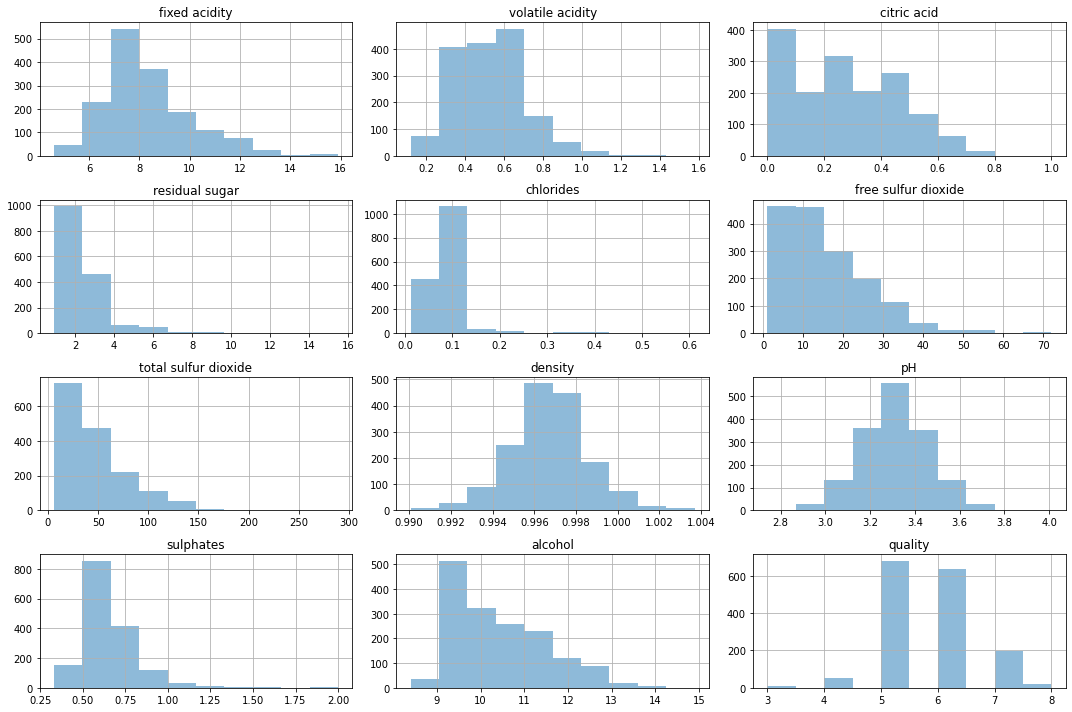

In [3]:
redWine.dtypes
redWine.describe()
redWine.info()

#Plotting histogram of each variable
redWine.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [4]:
#Replace the NAN with 0
#redWine.fillna(0, inplace = True)
#redWine.isnull().sum()
#redWine.isnull().any()

From here, we can see that 3 and 8 could be noise in the dataset. In the data cleaning process, we can delete those noise in order to get a better model

In [5]:
redWine['quality'].value_counts()
# redWine.drop(index = (redWine.loc[(redWine['Quality'] == 3)].index),inplace = True)
# redWine.drop(index = (redWine.loc[(redWine['Quality'] == 8)].index),inplace = True)
# redWine['Quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can see here the amount of data that fall into each class. class 5,6 and 7 have the largest amount of data and classes, 4,8 and 3 have a small amount of data. So we can merge the smaller groups in order to make a better model.

In [6]:
for i in range(len(redWine)):
    if redWine.iloc[i, -1] == 3:
        redWine.iloc[i, -1] = 5
        
    if redWine.iloc[i, -1] == 4:
        redWine.iloc[i, -1] = 5
        
    if redWine.iloc[i, -1] == 8:
        redWine.iloc[i, -1] = 7

In [7]:
redWine['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

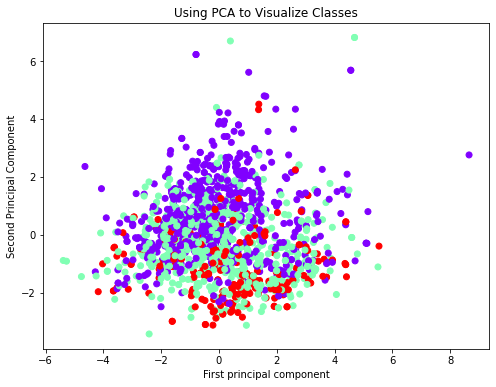

In [13]:
df_pca = redWine.copy()
X_pca = df_pca.loc[:, 'fixed acidity':'alcohol']
y_pca = df_pca['quality']

#X_pca.tail()

#Preprocessing in preparation for PCA: Standardizing the predictor variables
X_pca = StandardScaler().fit_transform(X_pca)

#Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

X_pca.shape


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
    
plt.show()

This is a very nonlinear data set no matter how you look at it in 2D.

In [14]:
pca.components_
print("explained variance: ", pca.explained_variance_, "\n")
exp_var_rat = pca.explained_variance_ratio_
print("explained variance ratio: ", exp_var_rat)

explained variance:  [3.10107182 1.92711489] 

explained variance ratio:  [0.28173931 0.1750827 ]


The first principal component is only 28.2% of the variance, and the second principal component is 17.5%. So two largest principal components account for 45.7% of the variance.

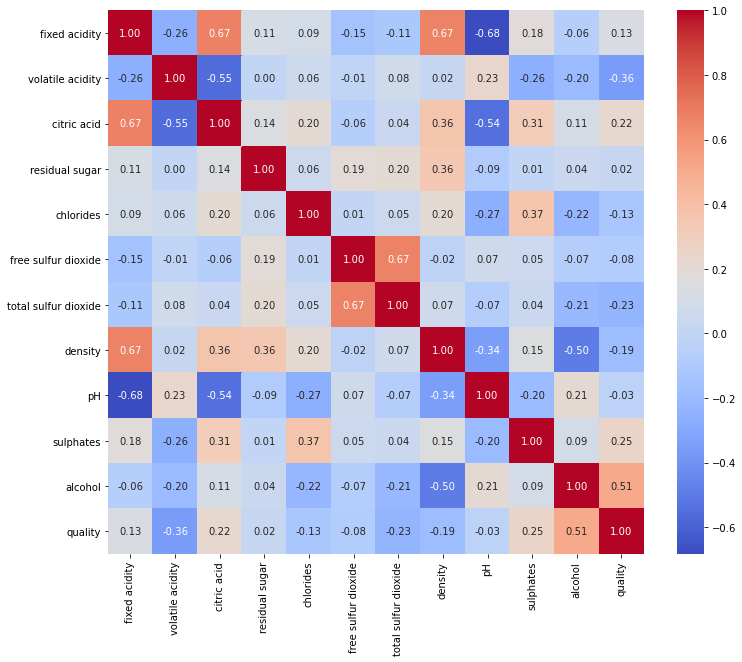

In [15]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(redWine.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

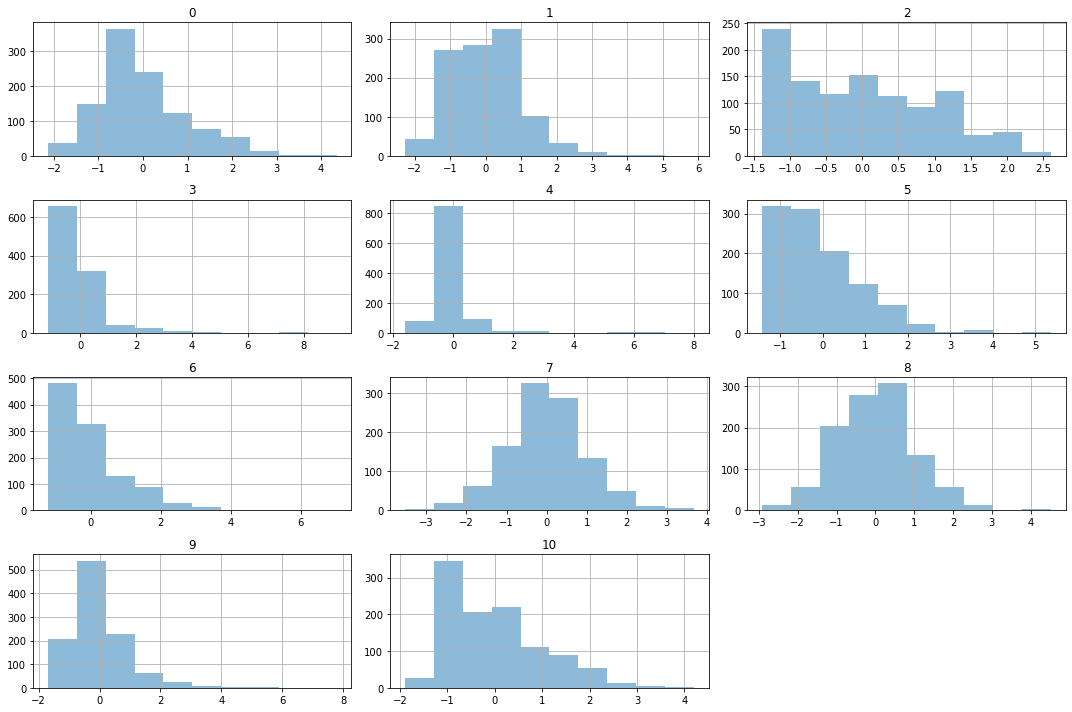

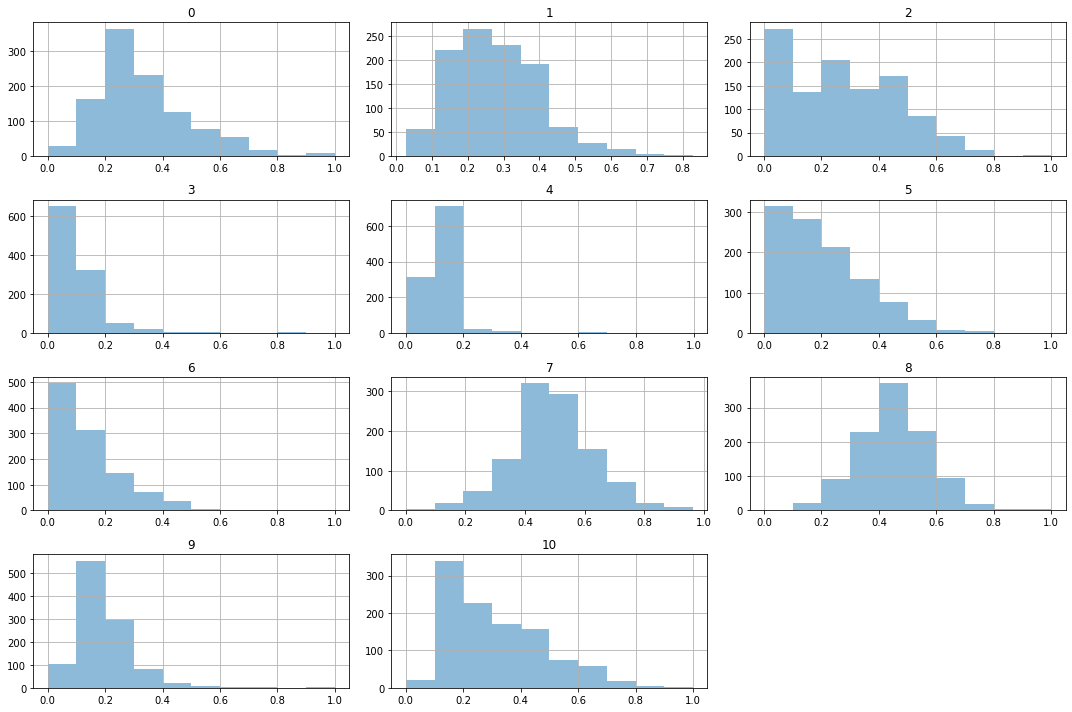

In [16]:
# split data to X and y and standardscaler
X = redWine.drop(['quality'], axis = 1)

X_std = StandardScaler().fit_transform(redWine.drop(['quality'], axis = 1))

X_min_max = MinMaxScaler().fit_transform(redWine.drop(['quality'], axis = 1))

y = redWine['quality']

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.33)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_min_max, y, test_size=0.33)

#plt.plot(X,y,'.')
#plt.show()
#plt.plot(X_std,y,'.')
#plt.show()
#plt.plot(X_min_max,y,'.')
#plt.show()
####################################################################################################3
## We replotted the different features after min max and standardization to see if it changed anything
## We notice that the data is still skewed
X_traind_std = pd.DataFrame(X_train_std)
X_traind_std.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

X_traind_mm = pd.DataFrame(X_train_mm)
X_traind_mm.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Classifier Methods

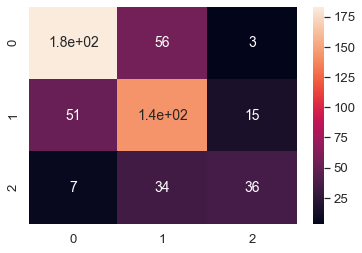

              precision    recall  f1-score   support

           5       0.76      0.76      0.76       242
           6       0.61      0.68      0.65       209
           7       0.67      0.47      0.55        77

    accuracy                           0.69       528
   macro avg       0.68      0.64      0.65       528
weighted avg       0.69      0.69      0.68       528



In [17]:
# KNN

classifier_knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance')
classifier_knn.fit(X_train_std,y_train_std)
pred_knn = classifier_knn.predict(X_test_std)

confusion_matrix_knn = confusion_matrix(y_test_std,pred_knn)
redWineData_cm_knn = pd.DataFrame(confusion_matrix_knn)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_knn, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_knn))

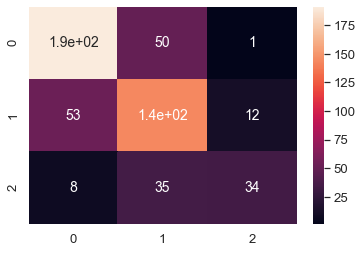

              precision    recall  f1-score   support

           5       0.76      0.79      0.77       242
           6       0.63      0.69      0.66       209
           7       0.72      0.44      0.55        77

    accuracy                           0.70       528
   macro avg       0.70      0.64      0.66       528
weighted avg       0.70      0.70      0.69       528



In [18]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=200, max_depth=100,  max_features='sqrt')
classifier_rf.fit(X_train_std, y_train_std)
pred_rf = classifier_rf.predict(X_test_std)


confusion_matrix_rf = confusion_matrix(y_test_std, pred_rf)
redWineData_cm_rf = pd.DataFrame(confusion_matrix_rf)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_rf, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_rf))

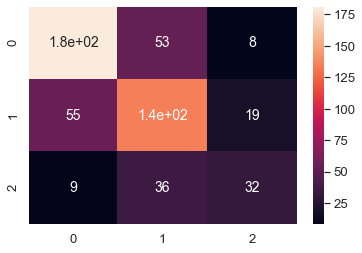

              precision    recall  f1-score   support

           5       0.74      0.75      0.74       242
           6       0.60      0.65      0.62       209
           7       0.54      0.42      0.47        77

    accuracy                           0.66       528
   macro avg       0.63      0.60      0.61       528
weighted avg       0.66      0.66      0.66       528



In [19]:
#ANN
from sklearn.neural_network import MLPClassifier
classifier_ann = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes = 700)
classifier_ann.fit(X_train_std, y_train_std)
pred_ann = classifier_ann.predict(X_test_std)

confusion_matrix_ann = confusion_matrix(y_test_std,pred_ann)
redWineData_cm_ann = pd.DataFrame(confusion_matrix_ann)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_ann, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_ann))

In [20]:
#############################################################################################33
## WE are now using GridSearch to find best parameters

In [21]:
from sklearn.ensemble import RandomForestClassifier
redWine_rfc = RandomForestClassifier(random_state=417)

#create a list of parameters you want to tune
param_grid_rfc = { 
    'n_estimators': [500, 600, 700, 800],
    'max_depth': [11,12,13] #5,6,7,8]
}

#fit the model using grid search
CV_rfc = GridSearchCV(estimator=redWine_rfc, param_grid=param_grid_rfc, cv= 6)
CV_rfc.fit(X_train_std, y_train_std)

#print the result of best hyperparameters
print(CV_rfc.best_params_)

{'max_depth': 13, 'n_estimators': 800}


In [22]:
redWine_ann = MLPClassifier(random_state=417)

#create a list of parameters you want to tune
param_grid_ann = { 
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes' : [50, 100, 150,200,300]
}

#fit the model using grid search
CV_ann = GridSearchCV(estimator=redWine_ann, param_grid=param_grid_ann, cv= 6)
CV_ann.fit(X_train_std, y_train_std)

#print the result of best hyperparameters
print(CV_ann.best_params_)
## Returns the parameters that we can optimize over
#redWine_ann.get_params().keys()


C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': 300}


C:\Users\matth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
#Create a default knn object
redWine_knn = KNeighborsClassifier()
k = list(range(1,400,10))
#create a list of parameters you want to tune
param_grid_knn = dict(n_neighbors =  k)
#fit the model using grid search
CV_knn = GridSearchCV(estimator = redWine_knn, param_grid=param_grid_knn, cv= 6)
CV_knn.fit(X_train_std, y_train_std)


#print the result of best hyperparameters


print(CV_knn.best_params_)

{'n_neighbors': 1}


In [24]:
redWine_knn = KNeighborsClassifier()
redWine_knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [25]:
####################################################################################################33
## Classification Repor of each method after gridSearch to find best parameters

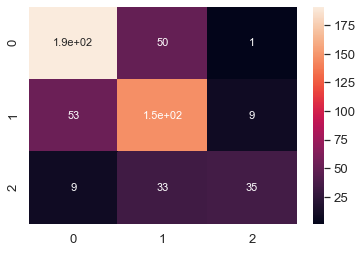

              precision    recall  f1-score   support

           5       0.75      0.79      0.77       242
           6       0.64      0.70      0.67       209
           7       0.78      0.45      0.57        77

    accuracy                           0.71       528
   macro avg       0.72      0.65      0.67       528
weighted avg       0.71      0.71      0.70       528



In [26]:
classifier_rf = RandomForestClassifier(n_estimators=800, max_depth=13,  max_features='sqrt')
classifier_rf.fit(X_train_std, y_train_std)
pred_rf = classifier_rf.predict(X_test_std)


confusion_matrix_rf = confusion_matrix(y_test_std, pred_rf)
redWineData_cm_rf = pd.DataFrame(confusion_matrix_rf)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_rf, annot=True, annot_kws={"size": 11}) # font size
plt.show()

print(classification_report(y_test_std, pred_rf))

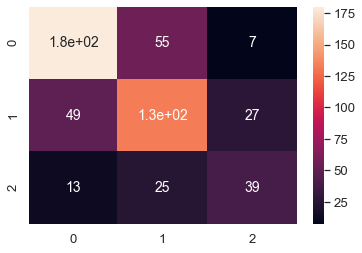

              precision    recall  f1-score   support

           5       0.74      0.74      0.74       242
           6       0.62      0.64      0.63       209
           7       0.53      0.51      0.52        77

    accuracy                           0.67       528
   macro avg       0.63      0.63      0.63       528
weighted avg       0.67      0.67      0.67       528



In [29]:
classifier_ann = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes = 300,max_iter = 400)
classifier_ann.fit(X_train_std, y_train_std)
pred_ann = classifier_ann.predict(X_test_std)

confusion_matrix_ann = confusion_matrix(y_test_std,pred_ann)
redWineData_cm_ann = pd.DataFrame(confusion_matrix_ann)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_ann, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_ann))

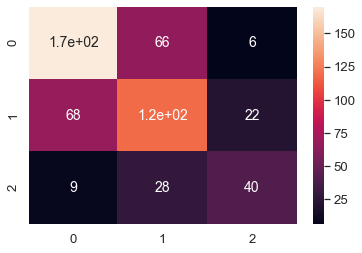

              precision    recall  f1-score   support

           5       0.69      0.70      0.70       242
           6       0.56      0.57      0.56       209
           7       0.59      0.52      0.55        77

    accuracy                           0.62       528
   macro avg       0.61      0.60      0.60       528
weighted avg       0.62      0.62      0.62       528



In [28]:
classifier_knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
classifier_knn.fit(X_train_std,y_train_std)
pred_knn = classifier_knn.predict(X_test_std)

confusion_matrix_knn = confusion_matrix(y_test_std,pred_knn)
redWineData_cm_knn = pd.DataFrame(confusion_matrix_knn)
sns.set(font_scale=1.2) # for label size
sns.heatmap(redWineData_cm_knn, annot=True, annot_kws={"size": 14}) # font size
plt.show()

print(classification_report(y_test_std, pred_knn))